<a href="https://colab.research.google.com/github/fakehaa/ML-PR/blob/main/ML%26PR_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2

In this lab I am practicing with OpenCV, applying different types of thresholds and detecting edges.

In [1]:
!pip install opencv-python

In [2]:
#importing libs
import cv2
import matplotlib.pyplot as plt


In [3]:
#reading the image
image_name = "/content/messi.jpg"

In [4]:
#reading the image
img= cv2.imread(image_name)
print(img.shape)
type(img)

(345, 552, 3)


In [5]:
print(img)

[[[140 138 137]
  [ 80  81  79]
  [ 55  54  56]
  ...
  [ 46  53  50]
  [ 80  85  83]
  [134 139 137]]

 [[143 141 140]
  [ 64  64  64]
  [ 40  42  43]
  ...
  [ 43  50  47]
  [ 58  63  61]
  [138 143 141]]

 [[149 149 149]
  [ 60  60  60]
  [ 43  45  46]
  ...
  [ 49  56  53]
  [ 55  60  58]
  [149 154 152]]

 ...

 [[137 152 144]
  [ 67  86  77]
  [ 89 110 101]
  ...
  [107 125 112]
  [ 82  93  83]
  [154 163 153]]

 [[117 126 123]
  [ 54  66  60]
  [ 72  88  81]
  ...
  [ 72  86  74]
  [ 50  58  48]
  [126 131 122]]

 [[166 171 170]
  [126 133 130]
  [147 156 153]
  ...
  [148 157 147]
  [116 118 112]
  [177 177 171]]]


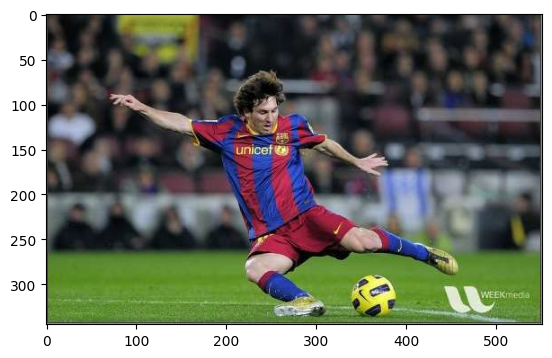

In [7]:
#converting from BGR format to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

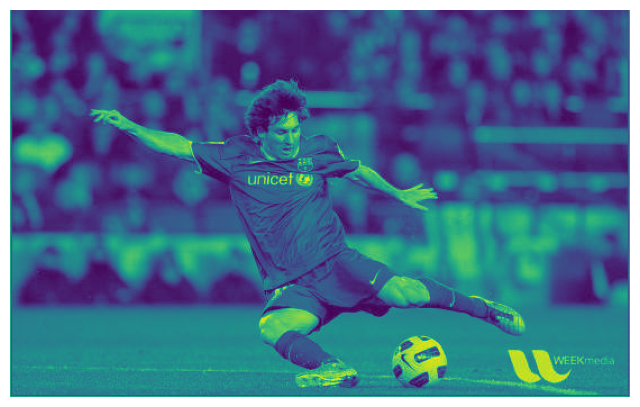

In [9]:
#monochroming the image
plt.figure(figsize=(8,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
plt.axis('off')
plt.show()

In [10]:
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img2)

[[138  80  55 ...  51  84 138]
 [141  64  42 ...  48  62 142]
 [149  60  45 ...  54  59 153]
 ...
 [148  81 105 ... 119  89 159]
 [124  63  84 ...  81  54 128]
 [170 131 154 ... 153 116 175]]


In [11]:
#trying on diff image
image_name = "/content/lion.webp"

In [13]:
img = cv2.imread(image_name)
type(img)

numpy.ndarray

In [14]:
print(img.shape)

(531, 850, 3)


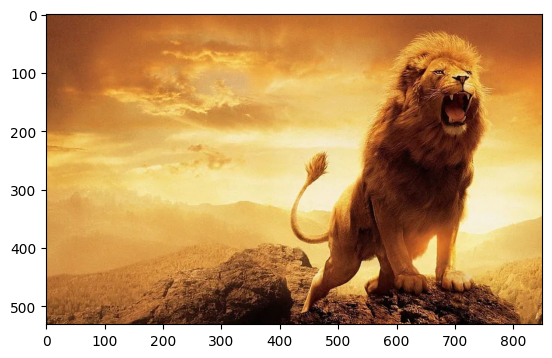

In [16]:
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_color)
plt.show()

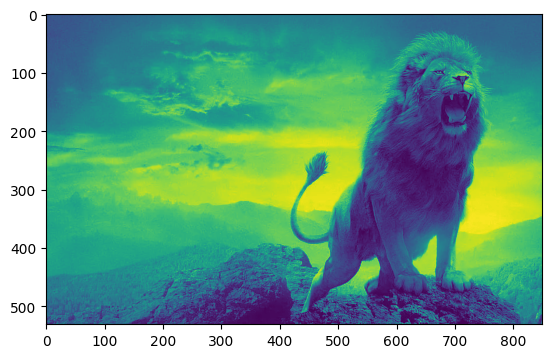

In [18]:
#convert to grayscale
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY )
plt.imshow(img_gray)
plt.show()

In [19]:
print(img_gray.shape)

(531, 850)


In [20]:
print(img_gray)

[[ 71  68  65 ...  75  79  84]
 [ 64  61  57 ...  72  71  76]
 [ 64  61  57 ...  72  71  75]
 ...
 [ 43  23  30 ...  21  30 129]
 [ 38  24  30 ...  26  54 110]
 [ 31  24  30 ...  35  75  99]]


Height and width of original image 531 850
Original Image


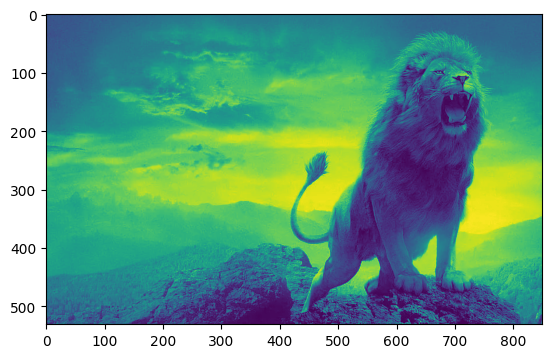

Rotated Image


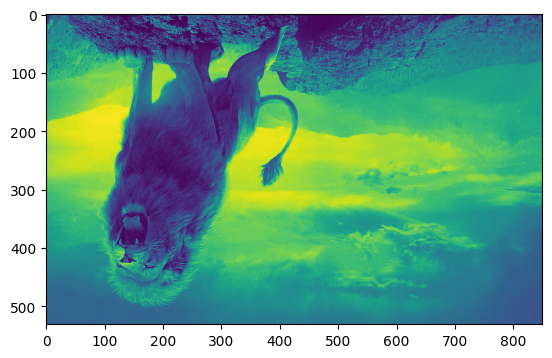

In [21]:
#getting cernter of image by dividing h and w by 2
height, width = img_gray.shape[:2]
print("Height and width of original image", height, width)

#getting coordinates of center of the image
center = (width/2, height/2)

#getting the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)

#rotate the img
rotated_image = cv2.warpAffine(src=img_gray, M=rotate_matrix, dsize=(width, height))

print("Original Image")
plt.imshow(img_gray)
plt.show()
print("Rotated Image")
plt.imshow(rotated_image)
plt.show()


Original Image


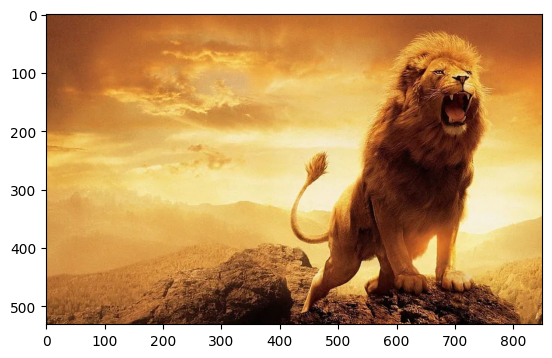

Rotated Image


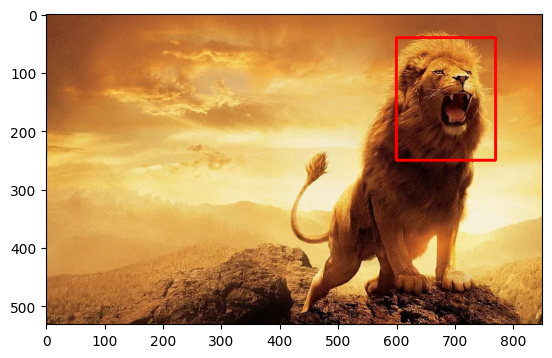

In [22]:
#annotate image
imageRectangle = img_color.copy()

#define start and end point
start_point =(600,40)
end_point =(770,250)

#draw the rectangle
cv2.rectangle(imageRectangle, start_point, end_point, (255, 0, 0), thickness= 3,lineType=cv2.LINE_8)

#display the rectangle
print("Original Image")
plt.imshow(img_color)
plt.show()
print("Rotated Image")
plt.imshow(imageRectangle)
plt.show()

Original Image annotated with text


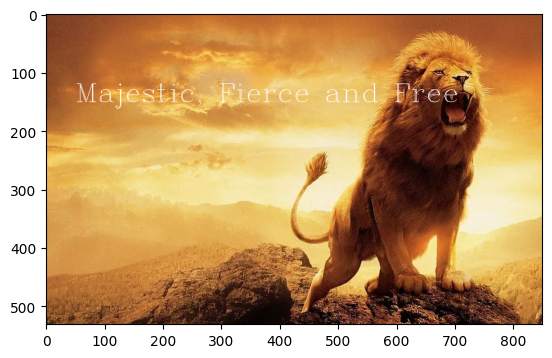

In [24]:
#aanotate with text
imageText = img_color.copy()
text = 'Majestic, Fierce and Free'
org = (50,150) #position of text on the image

cv2.putText(imageText, text, org, fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 1.5, color = (255,255,255))
print("Original Image annotated with text")
plt.imshow(imageText)

plt.show()

Original Image with identity kernel applied


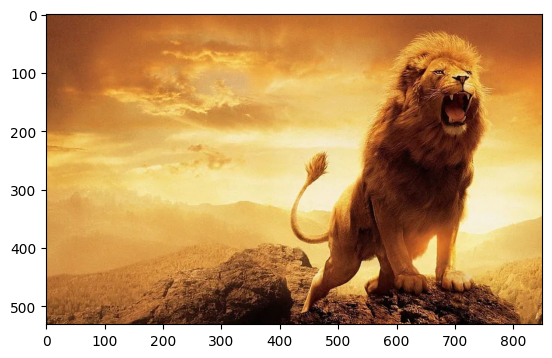

In [26]:
#filter with convolutional kernels
import numpy as np

kernel1 = np.array([[0, 0, 0],[0, 1, 0],[0, 0, 0]])

#applying the kernel
identity = cv2.filter2D(src=img_color, ddepth=-1, kernel=kernel1)
print("Original Image with identity kernel applied")
plt.imshow(identity)
plt.show()

Original Image with blurring kernel applied


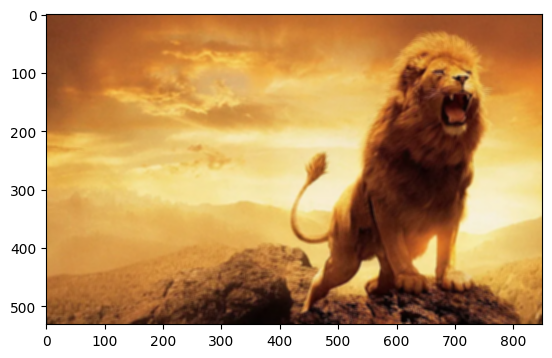

In [27]:
#dividing values by 25
kernel2 = np.ones((5, 5), np.float32) / 25

img_blurred = cv2.filter2D(src=img_color, ddepth=-1, kernel=kernel2)
print("Original Image with blurring kernel applied")
plt.imshow(img_blurred)

plt.show()

Original Image with median blur applied


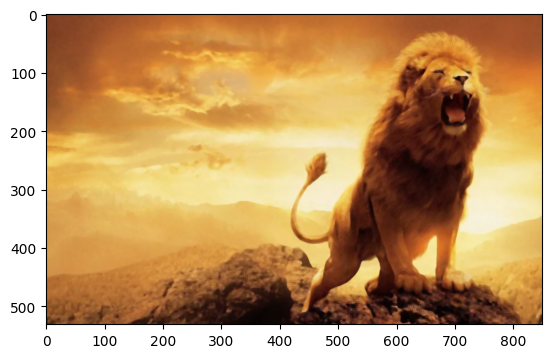

In [28]:
#Adding median blurring

median = cv2.medianBlur(src=img_color, ksize=5)
print("Original Image with median blur applied")
plt.imshow(median)
plt.show()

Original Image with Sharpening filter applied


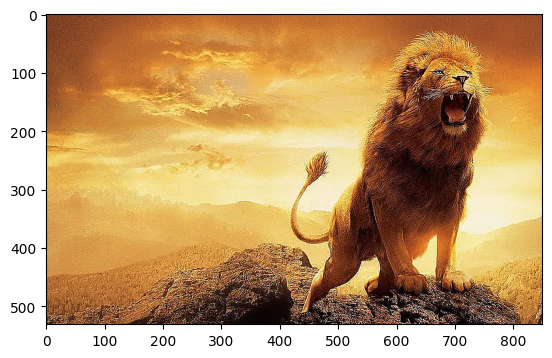

In [29]:
#image sharpeining with a kernal
kernel3 = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])

sharp_img = cv2.filter2D(src=img_color, ddepth=-1, kernel=kernel3)
print("Original Image with Sharpening filter applied")
plt.imshow(sharp_img)
plt.show()

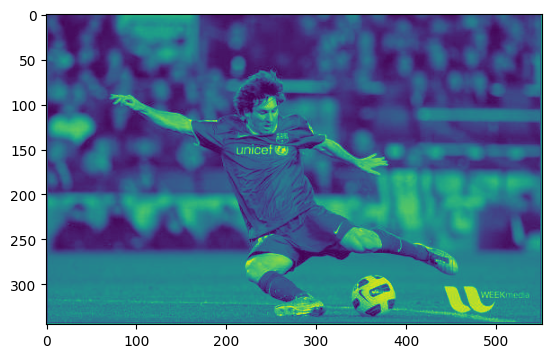

Grayscale Image with binary threshold applied


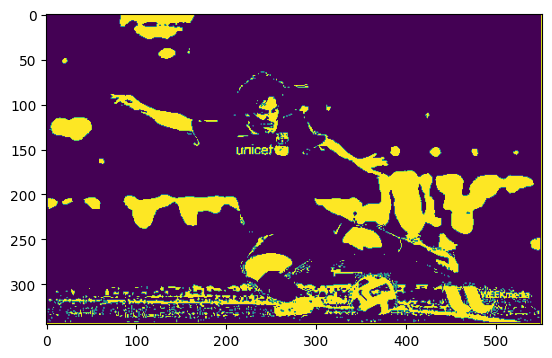

In [30]:
#image thresholding

image_source = "/content/messi.jpg"
img_grayscale = cv2.imread(image_source, cv2.IMREAD_GRAYSCALE);
plt.imshow(img_grayscale)
plt.show()

#simple threshold
th, dst = cv2.threshold(img_grayscale, 127, 255, cv2.THRESH_BINARY);
print("Grayscale Image with binary threshold applied")
plt.imshow(dst)
plt.show()


Grayscale Image with truncating threshold applied


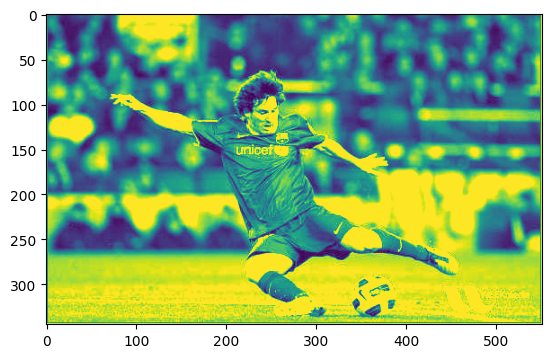

In [31]:
#truncating threshold
th,dst = cv2.threshold(img_grayscale,127,255, cv2.THRESH_TRUNC)
print("Grayscale Image with truncating threshold applied")
plt.imshow(dst)
plt.show()

Grayscale Image with inverse binary threshold applied


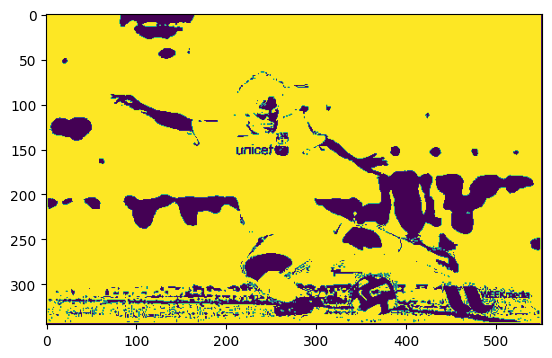

In [32]:
#binary threshold method
th, dst =  cv2.threshold(img_grayscale,127,255, cv2.THRESH_BINARY_INV)
print("Grayscale Image with inverse binary threshold applied")
plt.imshow(dst)
plt.show()

Grayscale Image with binary threshold to zero applied


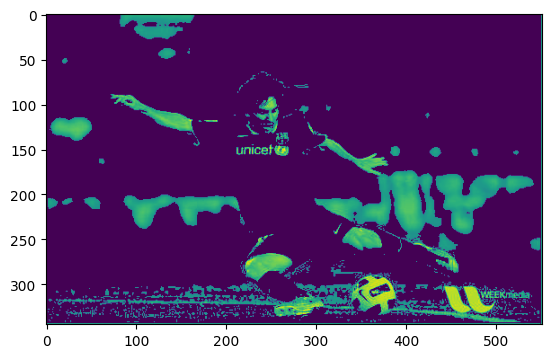

In [33]:
#threshold zero method
th, dst = cv2.threshold(img_grayscale,127,255, cv2.THRESH_TOZERO);
print("Grayscale Image with binary threshold to zero applied")
plt.imshow(dst)
plt.show()


Canny edge detection


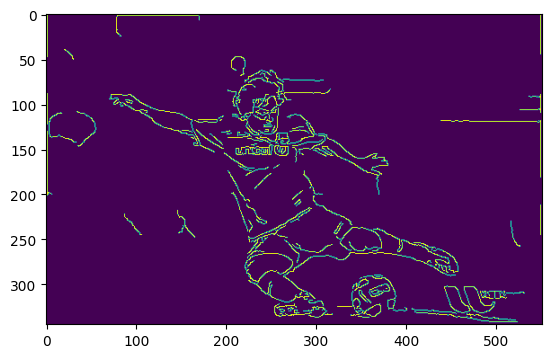

In [34]:
#Edge Detection
img_blur = cv2.GaussianBlur(img_grayscale, (3,3), 0)
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
print("Canny edge detection")
plt.imshow(edges)
plt.show()